# Revenue Analysis in Azerbaijan

#### In this notebook we'll be working on a dataset; the revenue from food, beverage and tobacco products in Azerbaijan. The goal is to understand how sales change over time, identify trends, growth or decline and compare performance.

### Setup

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

### Reading and preparing data

In [185]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\mypackage\rzaq-mhsullar-ickilr-v-tutun-mmulatlarnn-sat-dt_bg_007.csv')

In [186]:
#to get first five rows of dataframe
df.head()

,Year,Unnamed: 1,Meyvələrin pərakəndə satışı (min manat),Kartofun pərakəndə satışı (min manat),Tərəvəzin pərakəndə satışı (min manat),Emal edilmiş meyvə və tərəvəzin pərakəndə satışı (min manat),Ətin pərakəndə satışı (quş ətindən başqa) (min manat),Ev quşları ətinin pərakəndə satışı (min manat),Ət məhsullarının pərakəndə satışı (quş əti məhsulları daxil edilməklə) (min manat),Ət konservlərinin pərakəndə satışı (quş ətindən konservlər daxil edilməklə) (min manat),...,Araq və araq məmulatlarının pərakəndə satışı (min manat),Konyakın pərakəndə satışı (min manat),Şərabın pərakəndə satışı (min manat),Pivənin pərakəndə satışı (min manat),Şampan şərabının pərakəndə satışı (min manat),Spirtsiz içkilərin pərakəndə satışı (min manat),Mineral suların pərakəndə satışı (min manat),Tütün məmulatlarının pərakəndə satışı (min manat),"Diri kənd təsərrüfatı heyvanlarının pərakəndə satışı (diri mal-qara, qoyun-keçi, quşlar, atlar və s. diri heyvanlar) (min manat)",Digər qruplara daxil edilməyən kənd təsərrüfatı xammalının pərakəndə satışı (min manat)
0,2024,NaN,2993336.7,268959.6,8794091.1,132968.7,3098536.1,1276005.8,466207.7,19340.6,...,247223.9,10337.2,41376.1,233727.5,5348.3,226935.1,207260.9,1761176.2,2015806.1,23478.0
1,2023,NaN,2785798.8,301049.1,7886075.9,113668.0,2947460.8,1126742.6,421959.7,20867.5,...,200244.4,8850.7,42518.2,251370.5,6924.8,210236.3,197709.0,1660286.1,1947039.9,18491.1
2,2022,NaN,2669778.6,274134.1,6830916.8,88384.0,2558202.5,981025.0,336282.5,15273.2,...,191251.8,8534.4,39928.6,232241.6,7228.5,190607.4,179095.1,1607156.4,1762135.9,14902.6
3,2021,NaN,2418632.6,180948.0,4610855.6,63203.1,2261381.7,825940.6,271018.3,12390.0,...,176044.9,8234.9,40441.6,213332.9,7119.3,163956.7,151563.8,1524064.2,1645667.4,12288.5
4,2020,NaN,2390601.8,168893.6,3192861.5,53864.5,2249662.5,797474.9,259422.3,10913.5,...,171267.4,8310.6,38187.3,206175.0,7671.2,154212.6,146100.2,1399613.4,1641732.9,11918.6


In [187]:
#to drop unnecessary column
df = df.drop(columns=['Unnamed: 1'])

Checking columns

In [188]:
df.columns[::]

Index(['Year', 'Meyvələrin pərakəndə satışı (min manat)',
       'Kartofun pərakəndə satışı (min manat)',
       'Tərəvəzin pərakəndə satışı (min manat)',
       'Emal edilmiş meyvə və tərəvəzin pərakəndə satışı (min manat)',
       'Ətin pərakəndə satışı (quş ətindən başqa) (min manat)',
       'Ev quşları ətinin pərakəndə satışı (min manat)',
       'Ət məhsullarının pərakəndə satışı (quş əti məhsulları daxil edilməklə) (min manat)',
       'Ət konservlərinin pərakəndə satışı (quş ətindən konservlər daxil edilməklə) (min manat)',
       'Balığın pərakəndə satışı (min manat)',
       'Balıq konservlərinin pərakəndə satışı (min manat)',
       'Xərçəngkimilər və molyuskaların pərakəndə satışı (min manat)',
       'Çörək-bulka məhsullarının pərakəndə satışı (min manat)',
       'Şəkər qatılmış şirniyyat məmulatlarının pərakəndə satışı (min manat)',
       'Südün və süd məhsullarının pərakəndə satışı (min manat)',
       'Kərə yağının pərakəndə satışı (min manat)',
       'Pendir və brın

As you see column names are too long - not efficient for easy usage.

Switching column names to English versions (short and clean)

In [189]:
#create column map for changing names all in once
col_map = {
    "Year": "year",

    "Meyvələrin pərakəndə satışı (min manat)": "fruit",
    "Kartofun pərakəndə satışı (min manat)": "potato",
    "Tərəvəzin pərakəndə satışı (min manat)": "vegetable",
    "Emal edilmiş meyvə və tərəvəzin pərakəndə satışı (min manat)": "processed_fruit_vegetable",

    "Ətin pərakəndə satışı (quş ətindən başqa) (min manat)": "meat_excl_poultry",
    "Ev quşları ətinin pərakəndə satışı (min manat)": "poultry_meat",
    "Ət məhsullarının pərakəndə satışı (quş əti məhsulları daxil edilməklə) (min manat)": "meat_products_incl_poultry",
    "Ət konservlərinin pərakəndə satışı (quş ətindən konservlər daxil edilməklə) (min manat)": "canned_meat_incl_poultry",

    "Balığın pərakəndə satışı (min manat)": "fish",
    "Balıq konservlərinin pərakəndə satışı (min manat)": "canned_fish",
    "Xərçəngkimilər və molyuskaların pərakəndə satışı (min manat)": "crustaceans_mollusks",

    "Çörək-bulka məhsullarının pərakəndə satışı (min manat)": "bakery_products",
    "Şəkər qatılmış şirniyyat məmulatlarının pərakəndə satışı (min manat)": "sugar_confectionery",

    "Südün və süd məhsullarının pərakəndə satışı (min manat)": "milk_dairy",
    "Kərə yağının pərakəndə satışı (min manat)": "butter",
    "Pendir və brınzanın pərakəndə satışı (min manat)": "cheese",
    "Yumurtanın pərakəndə satışı (min manat)": "egg",

    "Qəhvə, çay, kakao və ədviyyatın pərakəndə satışı (min manat)": "coffee_tea_cocoa_spices",
    "Bitki yağının pərakəndə satışı (min manat)": "vegetable_oil",
    "Ərinmiş qida piylərinin pərakəndə satışı (min manat)": "rendered_fats",
    "Marqarin məhsullarının pərakəndə satışı (min manat)": "margarine",

    "Homogenləşdirilmiş qida məhsullarının və tibbi məqsədli qida məhsullarının pərakəndə satışı (min manat)": "homogenized_medical_food",

    "Qəndin pərakəndə satışı (min manat)": "sugar",
    "Mürəbbə, cem, povidlo və s. pərakəndə satışı (min manat)": "jam_preserves",

    "Unun pərakəndə satışı (min manat)": "flour",
    "Duzun pərakəndə satışı (min manat)": "salt",
    "Yarma və paxlalıların pərakəndə satışı (min manat)": "grains_legumes",
    "Makaronun pərakəndə satışı (min manat)": "pasta",

    "Sair qida məhsullarının pərakəndə satışı (min manat)": "other_food",

    "Araq və araq məmulatlarının pərakəndə satışı (min manat)": "vodka",
    "Konyakın pərakəndə satışı (min manat)": "cognac",
    "Şərabın pərakəndə satışı (min manat)": "wine",
    "Pivənin pərakəndə satışı (min manat)": "beer",
    "Şampan şərabının pərakəndə satışı (min manat)": "champagne",

    "Spirtsiz içkilərin pərakəndə satışı (min manat)": "non_alcoholic_beverages",
    "Mineral suların pərakəndə satışı (min manat)": "mineral_water",

    "Tütün məmulatlarının pərakəndə satışı (min manat)": "tobacco_products",

    "Diri kənd təsərrüfatı heyvanlarının pərakəndə satışı (diri mal-qara, qoyun-keçi, quşlar, atlar və s. diri heyvanlar) (min manat)": 
        "live_agricultural_animals",

    "Digər qruplara daxil edilməyən kənd təsərrüfatı xammalının pərakəndə satışı (min manat)": 
        "other_agricultural_raw_materials"
}
df = df.rename(columns=col_map)

In [190]:
#to read first five rows of dataframe to see how dataframe changed
#the columns represent revenue measured in thousand manat
df.head()

,year,fruit,potato,vegetable,processed_fruit_vegetable,meat_excl_poultry,poultry_meat,meat_products_incl_poultry,canned_meat_incl_poultry,fish,...,vodka,cognac,wine,beer,champagne,non_alcoholic_beverages,mineral_water,tobacco_products,live_agricultural_animals,other_agricultural_raw_materials
0,2024,2993336.7,268959.6,8794091.1,132968.7,3098536.1,1276005.8,466207.7,19340.6,613149.0,...,247223.9,10337.2,41376.1,233727.5,5348.3,226935.1,207260.9,1761176.2,2015806.1,23478.0
1,2023,2785798.8,301049.1,7886075.9,113668.0,2947460.8,1126742.6,421959.7,20867.5,609273.6,...,200244.4,8850.7,42518.2,251370.5,6924.8,210236.3,197709.0,1660286.1,1947039.9,18491.1
2,2022,2669778.6,274134.1,6830916.8,88384.0,2558202.5,981025.0,336282.5,15273.2,548308.7,...,191251.8,8534.4,39928.6,232241.6,7228.5,190607.4,179095.1,1607156.4,1762135.9,14902.6
3,2021,2418632.6,180948.0,4610855.6,63203.1,2261381.7,825940.6,271018.3,12390.0,488328.0,...,176044.9,8234.9,40441.6,213332.9,7119.3,163956.7,151563.8,1524064.2,1645667.4,12288.5
4,2020,2390601.8,168893.6,3192861.5,53864.5,2249662.5,797474.9,259422.3,10913.5,482355.2,...,171267.4,8310.6,38187.3,206175.0,7671.2,154212.6,146100.2,1399613.4,1641732.9,11918.6


In [191]:
df.isnull().sum() # to check whether there is empty value or not

year                                0
fruit                               0
potato                              0
vegetable                           0
processed_fruit_vegetable           0
meat_excl_poultry                   0
poultry_meat                        0
meat_products_incl_poultry          0
canned_meat_incl_poultry            0
fish                                0
canned_fish                         0
crustaceans_mollusks                0
bakery_products                     0
sugar_confectionery                 0
milk_dairy                          0
butter                              0
cheese                              0
egg                                 0
coffee_tea_cocoa_spices             0
vegetable_oil                       0
rendered_fats                       0
margarine                           0
homogenized_medical_food            0
sugar                               0
jam_preserves                       0
flour                               0
salt        

In [192]:
# to get information about data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              30 non-null     int64  
 1   fruit                             30 non-null     float64
 2   potato                            30 non-null     float64
 3   vegetable                         30 non-null     float64
 4   processed_fruit_vegetable         30 non-null     float64
 5   meat_excl_poultry                 30 non-null     float64
 6   poultry_meat                      30 non-null     float64
 7   meat_products_incl_poultry        30 non-null     float64
 8   canned_meat_incl_poultry          30 non-null     float64
 9   fish                              30 non-null     float64
 10  canned_fish                       30 non-null     float64
 11  crustaceans_mollusks              30 non-null     float64
 12  bakery_pro

So we found out that there is no empty(missing values) in our dataframe and learnt
most columns are in 'float64' data type.

#### Let's analyze our dataframe for further readability

In [193]:
#to show all columns in our dataframe
df.columns

Index(['year', 'fruit', 'potato', 'vegetable', 'processed_fruit_vegetable',
       'meat_excl_poultry', 'poultry_meat', 'meat_products_incl_poultry',
       'canned_meat_incl_poultry', 'fish', 'canned_fish',
       'crustaceans_mollusks', 'bakery_products', 'sugar_confectionery',
       'milk_dairy', 'butter', 'cheese', 'egg', 'coffee_tea_cocoa_spices',
       'vegetable_oil', 'rendered_fats', 'margarine',
       'homogenized_medical_food', 'sugar', 'jam_preserves', 'flour', 'salt',
       'grains_legumes', 'pasta', 'other_food', 'vodka', 'cognac', 'wine',
       'beer', 'champagne', 'non_alcoholic_beverages', 'mineral_water',
       'tobacco_products', 'live_agricultural_animals',
       'other_agricultural_raw_materials'],
      dtype='object')

As you see we can join some columns like 'potato' and 'vegetable' into one column

In [194]:
# Example: total_vegetable = potato + vegetable
df['total_vegetable'] = df[['potato', 'vegetable']].sum(axis=1)
df.drop(columns=['potato', 'vegetable'], inplace=True)

df['total_fruit'] = df[['fruit', 'processed_fruit_vegetable']].sum(axis=1)
df.drop(columns=['fruit', 'processed_fruit_vegetable'], inplace=True)

df['total_meat'] = df[["meat_excl_poultry",
                                        "poultry_meat",
                                        "meat_products_incl_poultry",
                                        "canned_meat_incl_poultry"]].sum(axis=1)
df.drop(columns=["meat_excl_poultry",
    "poultry_meat",
    "meat_products_incl_poultry",
    "canned_meat_incl_poultry"], inplace=True)

df["total_seafood"] = df[
        ["fish", "canned_fish", "crustaceans_mollusks"]].sum(axis=1)
df.drop(columns=['fish', 'canned_fish', 'crustaceans_mollusks'], inplace=True)

df["total_dairy"] = df[
    ["milk_dairy", "butter", "cheese", "egg"]].sum(axis=1)
df.drop(columns=['milk_dairy', 'butter', 'cheese', 'egg'], inplace=True)

df['total_sugary_products'] = df[
    ["sugar", "jam_preserves", "sugar_confectionery"]].sum(axis=1)
df.drop(columns=["sugar", "jam_preserves", "sugar_confectionery"], inplace=True)


df["total_grains"] = df[
    ["bakery_products", "flour", "pasta", "grains_legumes"]].sum(axis=1)
df.drop(columns=["bakery_products", "flour", "pasta", "grains_legumes"], inplace=True)

df["total_fats_oils"] = df[
    ["vegetable_oil", "margarine", "rendered_fats"]
].sum(axis=1)
df.drop(columns=["vegetable_oil", "margarine", "rendered_fats"], inplace=True)

df["alcoholic_beverages"] = df[
    ["beer", "wine", "cognac", "vodka", 'champagne']
].sum(axis=1)
df.drop(columns=["beer", "wine", "cognac", "vodka", "champagne"], inplace=True)

df["non_alcoholic_beverage"] = df[
    ["non_alcoholic_beverages", "mineral_water"]].sum(axis=1)
df.drop(columns=["non_alcoholic_beverages", "mineral_water"], inplace=True)

In [195]:
df.columns

Index(['year', 'coffee_tea_cocoa_spices', 'homogenized_medical_food', 'salt',
       'other_food', 'tobacco_products', 'live_agricultural_animals',
       'other_agricultural_raw_materials', 'total_vegetable', 'total_fruit',
       'total_meat', 'total_seafood', 'total_dairy', 'total_sugary_products',
       'total_grains', 'total_fats_oils', 'alcoholic_beverages',
       'non_alcoholic_beverage'],
      dtype='object')

In [196]:
#to check for changes by reading first 5 rows
df.head()

,year,coffee_tea_cocoa_spices,homogenized_medical_food,salt,other_food,tobacco_products,live_agricultural_animals,other_agricultural_raw_materials,total_vegetable,total_fruit,total_meat,total_seafood,total_dairy,total_sugary_products,total_grains,total_fats_oils,alcoholic_beverages,non_alcoholic_beverage
0,2024,524207.7,94888.1,100352.2,2025697.4,1761176.2,2015806.1,23478.0,9063050.7,3126305.4,4860090.2,701215.3,2899672.4,2389532.5,2809173.2,767760.3,538013.0,434196.0
1,2023,513006.5,91877.4,83533.7,2673297.3,1660286.1,1947039.9,18491.1,8187125.0,2899466.8,4517030.6,700219.2,2870447.9,2331013.4,2795921.1,806801.0,509908.6,407945.3
2,2022,409359.5,87384.9,61250.1,2284743.1,1607156.4,1762135.9,14902.6,7105050.9,2758162.6,3890783.2,615281.8,2631840.3,2060364.9,2493233.6,749594.5,479184.9,369702.5
3,2021,342055.4,80862.0,50159.5,1877184.1,1524064.2,1645667.4,12288.5,4791803.6,2481835.7,3370730.6,542074.0,2285121.2,1761191.7,1919818.5,585841.8,445173.6,315520.5
4,2020,363546.3,81605.4,44530.9,1772638.5,1399613.4,1641732.9,11918.6,3361755.1,2444466.3,3317473.2,529364.6,2098865.1,1602483.9,1794587.2,488314.6,431611.5,300312.8


In [197]:
df.columns

Index(['year', 'coffee_tea_cocoa_spices', 'homogenized_medical_food', 'salt',
       'other_food', 'tobacco_products', 'live_agricultural_animals',
       'other_agricultural_raw_materials', 'total_vegetable', 'total_fruit',
       'total_meat', 'total_seafood', 'total_dairy', 'total_sugary_products',
       'total_grains', 'total_fats_oils', 'alcoholic_beverages',
       'non_alcoholic_beverage'],
      dtype='object')

In [198]:
df.shape

(30, 18)

as a result the number of columns decreased (from 40 to 18) and that increased efficiency.

### Now, it is ready for visualization.

### How have total sales changed over time?

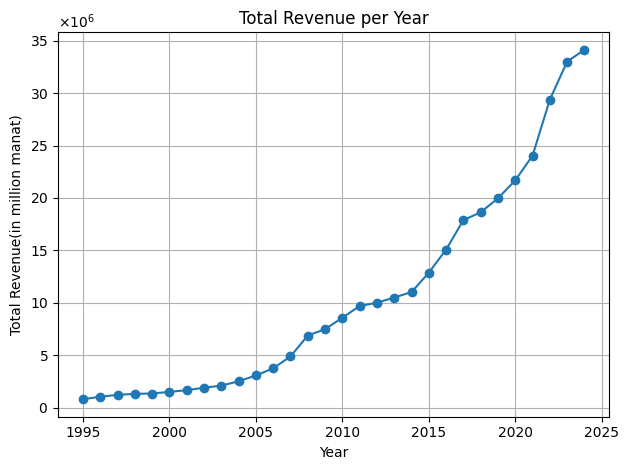

In [199]:
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 6)) # to set power to be seen as one million

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='y', style='sci', scilimits=(6, 6))
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue(in million manat)')
plt.xticks(range(1995, 2026, 5))
plt.plot(df.groupby('year').sum().index, df.groupby('year').sum().sum(axis=1), marker='o')
plt.grid()
plt.tight_layout()
plt.show()


as we see there is no significant declines in sales.

### Which year had the highest and lowest sales?

In [200]:
#crates a new column for total sales for each year
df['total_sales'] = df.drop(columns='year').sum(axis=1)

In [201]:
#to get the year with the highest sale
highest_year = df.loc[df['total_sales'].idxmax(), 'year']
highest_sale = df['total_sales'].max() #to get the highest sale

#to get the year with lowest sale
lowest_year = df.loc[df['total_sales'].idxmin(), 'year']
lowest_sale = df['total_sales'].min() #to get the lowest sale


In [202]:
df.head()

,year,coffee_tea_cocoa_spices,homogenized_medical_food,salt,other_food,tobacco_products,live_agricultural_animals,other_agricultural_raw_materials,total_vegetable,total_fruit,total_meat,total_seafood,total_dairy,total_sugary_products,total_grains,total_fats_oils,alcoholic_beverages,non_alcoholic_beverage,total_sales
0,2024,524207.7,94888.1,100352.2,2025697.4,1761176.2,2015806.1,23478.0,9063050.7,3126305.4,4860090.2,701215.3,2899672.4,2389532.5,2809173.2,767760.3,538013.0,434196.0,34134614.7
1,2023,513006.5,91877.4,83533.7,2673297.3,1660286.1,1947039.9,18491.1,8187125.0,2899466.8,4517030.6,700219.2,2870447.9,2331013.4,2795921.1,806801.0,509908.6,407945.3,33013410.9
2,2022,409359.5,87384.9,61250.1,2284743.1,1607156.4,1762135.9,14902.6,7105050.9,2758162.6,3890783.2,615281.8,2631840.3,2060364.9,2493233.6,749594.5,479184.9,369702.5,29380131.7
3,2021,342055.4,80862.0,50159.5,1877184.1,1524064.2,1645667.4,12288.5,4791803.6,2481835.7,3370730.6,542074.0,2285121.2,1761191.7,1919818.5,585841.8,445173.6,315520.5,24031392.3
4,2020,363546.3,81605.4,44530.9,1772638.5,1399613.4,1641732.9,11918.6,3361755.1,2444466.3,3317473.2,529364.6,2098865.1,1602483.9,1794587.2,488314.6,431611.5,300312.8,21684820.3


In [203]:
#color list for future use in legend
colors = []
for i in df.index:
    if i == df['total_sales'].idxmax(): #fill year with the highest value with 'green'
        colors.append('green')
    elif i == df['total_sales'].idxmin(): #fill year with the lowest value with 'red'
        colors.append('red')
    else: #fill other years with 'gray'
        colors.append('gray')

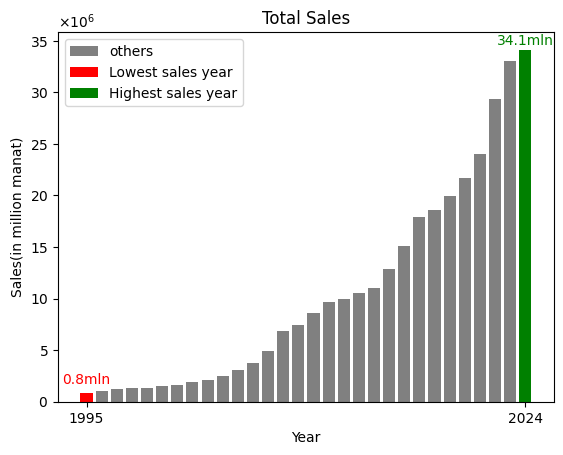

In [204]:
#Patch is a small colored shape used in a legend
#it shows color and its meaning
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', label='others'),
    Patch(facecolor='red', label='Lowest sales year'),
    Patch(facecolor='green', label='Highest sales year')
]
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 6))

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='y', style='sci', scilimits=(6, 6))

plt.bar(df['year'], df['total_sales'], color=colors) #create vertical bars to represent sales across years

plt.title('Total Sales')
plt.xlabel('Year')
plt.ylabel('Sales(in million manat)')
plt.yticks()
plt.text(df.loc[df['total_sales'].idxmax(),'year'], highest_sale + 500000,
         f"{round(highest_sale/1_000_000, 1)}mln", ha='center', color='green')
plt.text(df.loc[df['total_sales'].idxmin(), 'year'], lowest_sale + 900000,
         f"{round(lowest_sale/1_000_000, 1)}mln", ha='center', color='red')
plt.xticks([1995, 2024])
plt.legend(handles=legend_elements) #legend uses that elements to represent data
plt.show()


In [205]:
df.head()

,year,coffee_tea_cocoa_spices,homogenized_medical_food,salt,other_food,tobacco_products,live_agricultural_animals,other_agricultural_raw_materials,total_vegetable,total_fruit,total_meat,total_seafood,total_dairy,total_sugary_products,total_grains,total_fats_oils,alcoholic_beverages,non_alcoholic_beverage,total_sales
0,2024,524207.7,94888.1,100352.2,2025697.4,1761176.2,2015806.1,23478.0,9063050.7,3126305.4,4860090.2,701215.3,2899672.4,2389532.5,2809173.2,767760.3,538013.0,434196.0,34134614.7
1,2023,513006.5,91877.4,83533.7,2673297.3,1660286.1,1947039.9,18491.1,8187125.0,2899466.8,4517030.6,700219.2,2870447.9,2331013.4,2795921.1,806801.0,509908.6,407945.3,33013410.9
2,2022,409359.5,87384.9,61250.1,2284743.1,1607156.4,1762135.9,14902.6,7105050.9,2758162.6,3890783.2,615281.8,2631840.3,2060364.9,2493233.6,749594.5,479184.9,369702.5,29380131.7
3,2021,342055.4,80862.0,50159.5,1877184.1,1524064.2,1645667.4,12288.5,4791803.6,2481835.7,3370730.6,542074.0,2285121.2,1761191.7,1919818.5,585841.8,445173.6,315520.5,24031392.3
4,2020,363546.3,81605.4,44530.9,1772638.5,1399613.4,1641732.9,11918.6,3361755.1,2444466.3,3317473.2,529364.6,2098865.1,1602483.9,1794587.2,488314.6,431611.5,300312.8,21684820.3


Year 1995 is the year with the lowest sales marked by 'red' color, while 2024 has the highest sales and marked by 'green' color.This shows significant change in sales over 30 years.

### How sales in alcoholic beveraged changed over the years?(by percentage)

In [206]:
df.head()

,year,coffee_tea_cocoa_spices,homogenized_medical_food,salt,other_food,tobacco_products,live_agricultural_animals,other_agricultural_raw_materials,total_vegetable,total_fruit,total_meat,total_seafood,total_dairy,total_sugary_products,total_grains,total_fats_oils,alcoholic_beverages,non_alcoholic_beverage,total_sales
0,2024,524207.7,94888.1,100352.2,2025697.4,1761176.2,2015806.1,23478.0,9063050.7,3126305.4,4860090.2,701215.3,2899672.4,2389532.5,2809173.2,767760.3,538013.0,434196.0,34134614.7
1,2023,513006.5,91877.4,83533.7,2673297.3,1660286.1,1947039.9,18491.1,8187125.0,2899466.8,4517030.6,700219.2,2870447.9,2331013.4,2795921.1,806801.0,509908.6,407945.3,33013410.9
2,2022,409359.5,87384.9,61250.1,2284743.1,1607156.4,1762135.9,14902.6,7105050.9,2758162.6,3890783.2,615281.8,2631840.3,2060364.9,2493233.6,749594.5,479184.9,369702.5,29380131.7
3,2021,342055.4,80862.0,50159.5,1877184.1,1524064.2,1645667.4,12288.5,4791803.6,2481835.7,3370730.6,542074.0,2285121.2,1761191.7,1919818.5,585841.8,445173.6,315520.5,24031392.3
4,2020,363546.3,81605.4,44530.9,1772638.5,1399613.4,1641732.9,11918.6,3361755.1,2444466.3,3317473.2,529364.6,2098865.1,1602483.9,1794587.2,488314.6,431611.5,300312.8,21684820.3


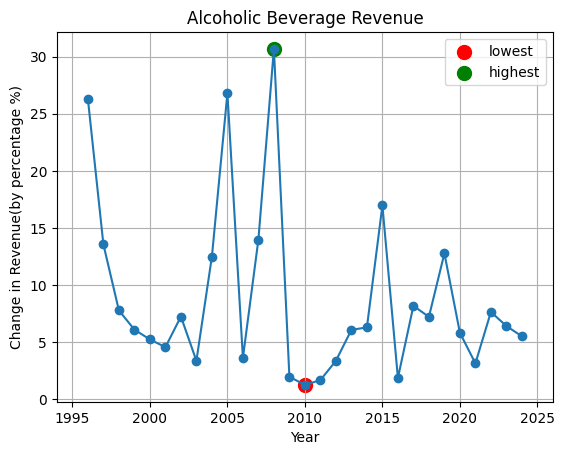

In [207]:
#in our data the years are given in a decreasing order
#for percentage change we have to define them in an increasing order
percentage_change_a = df.set_index('year')['alcoholic_beverages'][::-1].pct_change()*100 
plt.grid()
plt.title('Alcoholic Beverage Revenue')
plt.xlabel('Year')
plt.ylabel('Change in Revenue(by percentage %)')
plt.xlim([1994, 2026])

plt.plot(df['year'][::-1].reset_index(drop=True), percentage_change_a, marker='o')

plt.scatter(percentage_change_a.idxmin(), 
            percentage_change_a[percentage_change_a.idxmin()],
            c='r', s=100, label='lowest')
plt.scatter(percentage_change_a.idxmax(),
            percentage_change_a[percentage_change_a.idxmax()],
            c='g', s=100, label='highest')
plt.legend()
plt.show()

this visualization shows us that alcohol sales never dropped(as percentage change is positive for all years)

### A heatmap was used to visualize revenue across categories and years. Rows represent years, columns represent product categories, and color intensity indicates revenue levels. This visualization allows easy identification of the highest-income category for each year.

In [208]:
#this keeps our categorical columns in a variable
categorical_cols = df.drop(columns=['year', 'total_sales']).columns

In [209]:
#to make dataframe where 'year' column is put as index
categories_by_year = df.set_index('year')[categorical_cols]

#this firstly gets the highest revenue category for each year
#then shows all dominant categories
dominant_categories = categories_by_year.idxmax(axis=1).unique()


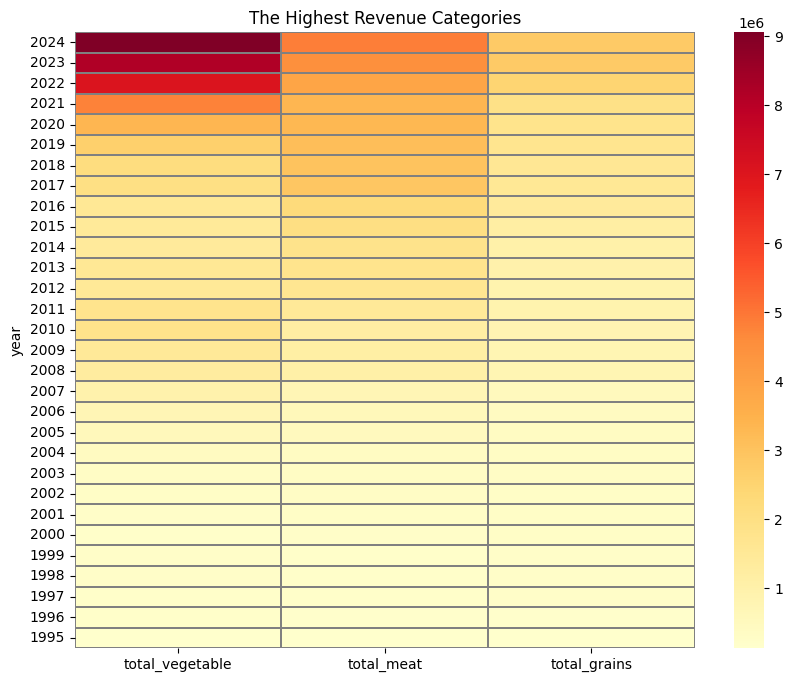

In [210]:
plt.figure(figsize=(10, 8))
plt.title('The Highest Revenue Categories')
sns.heatmap(df.set_index('year')[dominant_categories], cmap='YlOrRd',linewidths=0.3, linecolor='gray')
plt.show()

We can get from heatmap that until year 2008 there is no visible difference in revenue. The intensity of color indicating vegetable sales has increased starting from year 2020. So vegetable sales keeps leadership in the market since 2020.

The change in vegetable sales starting from 2019 could be explained by COVID 19 pandemic, as people may consume more vegetable-based meals to stay healthy.

### Now, let's plot changes in vegetable revenue to see the growth visually.

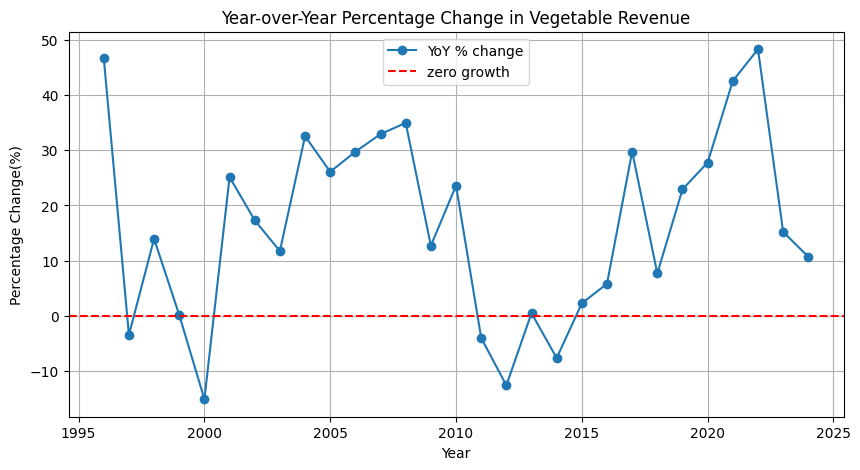

In [211]:
percentage_change_v = df.set_index('year')['total_vegetable'][::-1].pct_change()*100
plt.figure(figsize=(10, 5))
plt.title('Year-over-Year Percentage Change in Vegetable Revenue')
plt.xlabel('Year')
plt.ylabel('Percentage Change(%)')
plt.plot(percentage_change_v, marker='o', label='YoY % change')
plt.axhline(y=0, c='r', linestyle='--', label='zero growth')
plt.grid(True)
plt.legend(loc='upper center')
plt.show()

The points below the red line(zero growth) show drop in revenue while points above red line indicate growth.

The visualization of vegetable sales revealed several periods of negative year-over-year growth. Based on this observation let's compare it with alcoholic beverage sales.

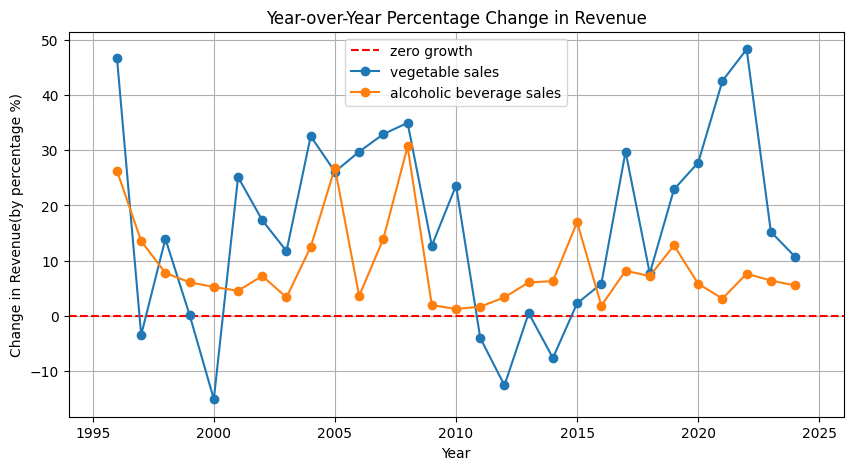

In [212]:
plt.figure(figsize=(10, 5))
plt.title('Year-over-Year Percentage Change in Revenue')
plt.xlabel('Year')
plt.ylabel('Change in Revenue(by percentage %)')
plt.xlim([1994, 2026])

percentage_change_a = df.set_index('year')['alcoholic_beverages'][::-1].pct_change()*100 
percentage_change_v = df.set_index('year')['total_vegetable'][::-1].pct_change()*100

plt.axhline(y=0, c='r', linestyle='--', label='zero growth')
plt.plot(percentage_change_v, marker='o', label='vegetable sales')
plt.plot(percentage_change_a, marker='o', label='alcoholic beverage sales')
plt.grid()
plt.legend(loc='upper center')
plt.show()

This comparison highlights the higher volatility of vegetable sales relative to the stability of alcoholic beverage revenue.


### Let's use bar chart below to compare dominant categories based on number of years

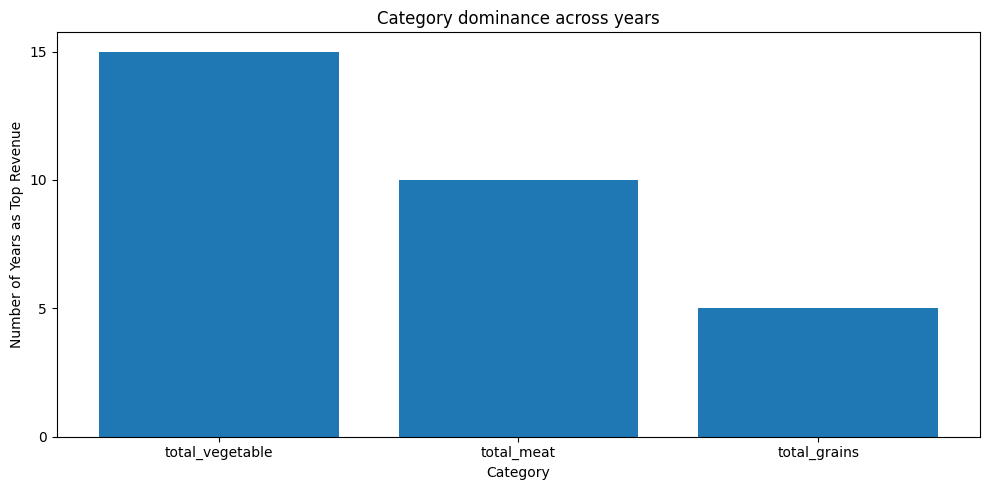

In [213]:
plt.figure(figsize=(10, 5))
plt.title('Category dominance across years')
plt.xlabel('Category')
plt.ylabel('Number of Years as Top Revenue')

plt.yticks(range(0, 16, 5))
plt.bar(categories_by_year.idxmax(axis=1).value_counts().index, # dominant category names
        categories_by_year.idxmax(axis=1).value_counts()) # the number of years
plt.tight_layout()


as we see the vegetable has been dominant category for 15 years, while meat and grains category have dominance of 10, 5 years accordingly. By the way, dominance is intermittent rather than continuous.

### Key Insights from Revenue Analysis

- There is no decline in the total revenue across years
- Percentage change in alcoholic beverage revenue never dropped below zero.
- Year-over-year vegetable revenue increased sharply after 2019.
- This change may be influenced by COVID-19 and increased health-conscious consumption.
- The year-over-year percentage change in vegetable revenue dropped below zero several times, indicating declines, while alcoholic beverage sales never experienced any decline during the same period.
- Food categories still dominate total revenue in absolute terms.
